In [19]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 810.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.9 MB/s eta 0:00:00


In [30]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 23.6 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
print(os.listdir('/content/drive'))

Mounted at /content/drive
['MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']


In [2]:
import os

ozone_folder_path = '/content/drive/My Drive/ozone'
os.listdir(ozone_folder_path)

['Underhill.csv', 'Bennigton.csv']

In [3]:
import os
import pandas as pd

# Folder path for the ozone datasets
ozone_folder_path = '/content/drive/My Drive/ozone'

bennington_path = os.path.join(ozone_folder_path, 'Bennigton.csv')

# Load the datasets
bennington_df = pd.read_csv(bennington_path)

# Function to calculate word count and character count for each column
def count_words_and_chars(df):
    word_count = df.applymap(lambda x: len(str(x).split()) if isinstance(x, str) else 0).sum().sum()
    char_count = df.applymap(lambda x: len(str(x)) if isinstance(x, str) else 0).sum().sum()
    return word_count, char_count

# Bennington dataset
bennington_size = bennington_df.memory_usage(deep=True).sum()
bennington_row_count, bennington_col_count = bennington_df.shape
bennington_word_count, bennington_char_count = count_words_and_chars(bennington_df)


# Display results
print(f"Bennington Dataset:")
print(f"  Size: {bennington_size} bytes")
print(f"  Rows: {bennington_row_count}, Columns: {bennington_col_count}")
print(f"  Word Count: {bennington_word_count}")
print(f"  Character Count: {bennington_char_count}\n")


/tmp/ipython-input-1978302717.py:10: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  bennington_df = pd.read_csv(bennington_path)
/tmp/ipython-input-1978302717.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  word_count = df.applymap(lambda x: len(str(x).split()) if isinstance(x, str) else 0).sum().sum()
/tmp/ipython-input-1978302717.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  char_count = df.applymap(lambda x: len(str(x)) if isinstance(x, str) else 0).sum().sum()


Bennington Dataset:
  Size: 199785935 bytes
  Rows: 268106, Columns: 25
  Word Count: 3966279
  Character Count: 29806599



In [6]:
# Remove unnecessary columns (POC, Site_Num, Method_Type)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

bennington_cleaned_df = bennington_df.drop(columns=['POC', 'Site_Num', 'Method_Type'])
# Normalize the numerical columns
numerical_columns = ['Latitude', 'Longitude', 'Horizontal_Accuracy', 'State_Code', 'County_Code', 'Parameter_Code', 'Sample_Measurement']
scaler = MinMaxScaler()
bennington_cleaned_df[numerical_columns] = scaler.fit_transform(bennington_cleaned_df[numerical_columns])

# Tokenize any textual data (like 'AQS_Parameter_Desc', 'Method_Description')
text_columns = ['AQS_Parameter_Desc', 'Method_Description']
vectorizer = CountVectorizer(stop_words='english')

# Tokenizing the 'Method_Description' column
bennington_text_tokenized = vectorizer.fit_transform(bennington_cleaned_df['Method_Description'].fillna(''))

In [7]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [8]:
 #Remove HTML tags from relevant columns (in case there are any HTML tags)
bennington_cleaned_df['Method_Description'] = bennington_cleaned_df['Method_Description'].apply(lambda x: str(x) if isinstance(x, str) else '')
# Reapply the HTML tag removal
bennington_cleaned_df['Method_Description'] = bennington_cleaned_df['Method_Description'].apply(remove_html_tags)


In [9]:
print("\nCleaned Bennigton Dataset Head:")
print(bennington_cleaned_df.head())


Cleaned Bennigton Dataset Head:
   Latitude  Longitude  Datum  Horizontal_Accuracy  State_Code  County_Code  \
0       1.0        0.0  WGS84                  0.0         0.0          0.0   
1       1.0        0.0  WGS84                  0.0         0.0          0.0   
2       1.0        0.0  WGS84                  0.0         0.0          0.0   
3       1.0        0.0  WGS84                  0.0         0.0          0.0   
4       1.0        0.0  WGS84                  0.0         0.0          0.0   

   Parameter_Code AQS_Parameter_Desc Date_Local 24_Hour_Local  ... Year_GMT  \
0             0.0              Ozone   4/1/1990      01:00:00  ...   1990.0   
1             0.0              Ozone   4/1/1990      02:00:00  ...   1990.0   
2             0.0              Ozone   4/1/1990      03:00:00  ...   1990.0   
3             0.0              Ozone   4/1/1990      04:00:00  ...   1990.0   
4             0.0              Ozone   4/1/1990      05:00:00  ...   1990.0   

  Day_In_Year_GMT

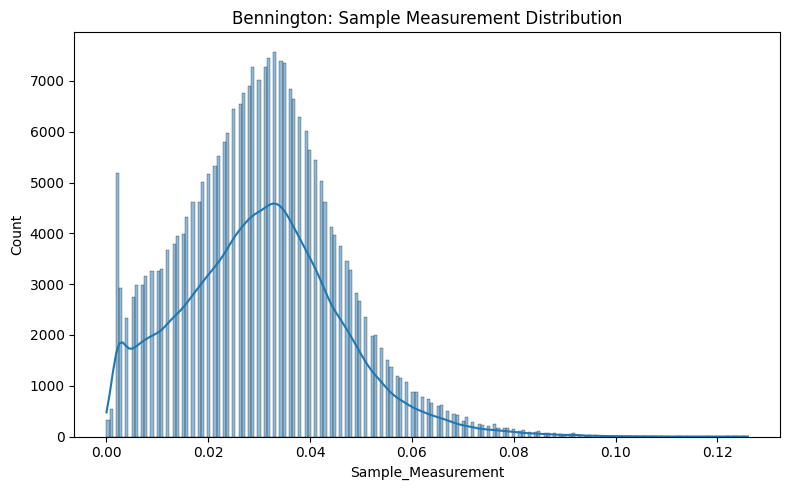

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(bennington_df['Sample_Measurement'], kde=True, ax=axes).set_title("Bennington: Sample Measurement Distribution")
plt.tight_layout()
plt.show()

In [13]:
import numpy as np

bennington_numeric = bennington_df.select_dtypes(include=np.number)
bennington_corr = bennington_numeric.corr()

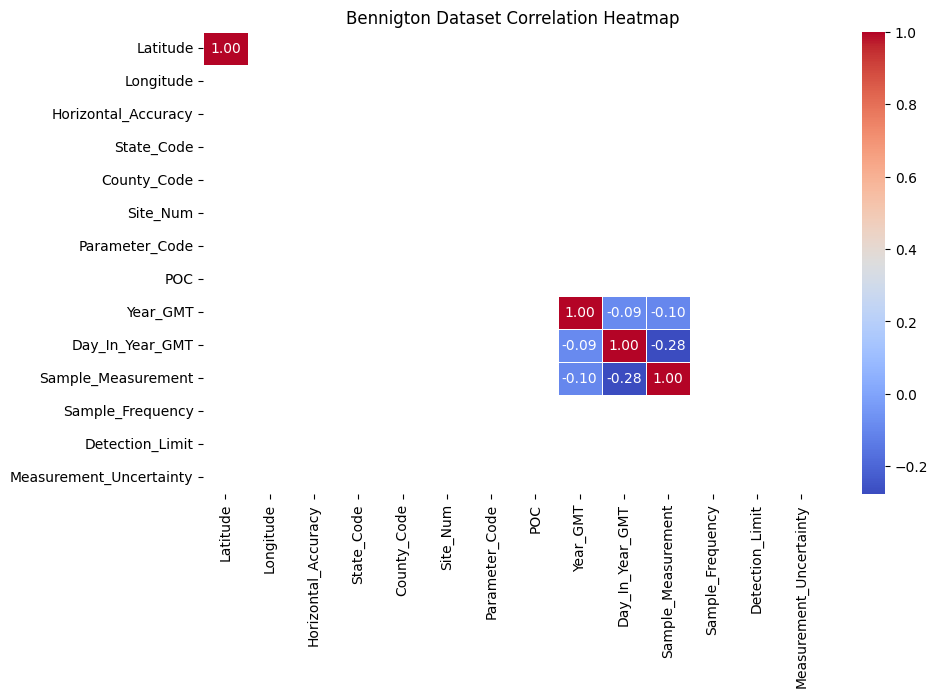

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(bennington_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Bennigton Dataset Correlation Heatmap")
plt.show()

In [15]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 14.6 MB/s eta 0:00:00


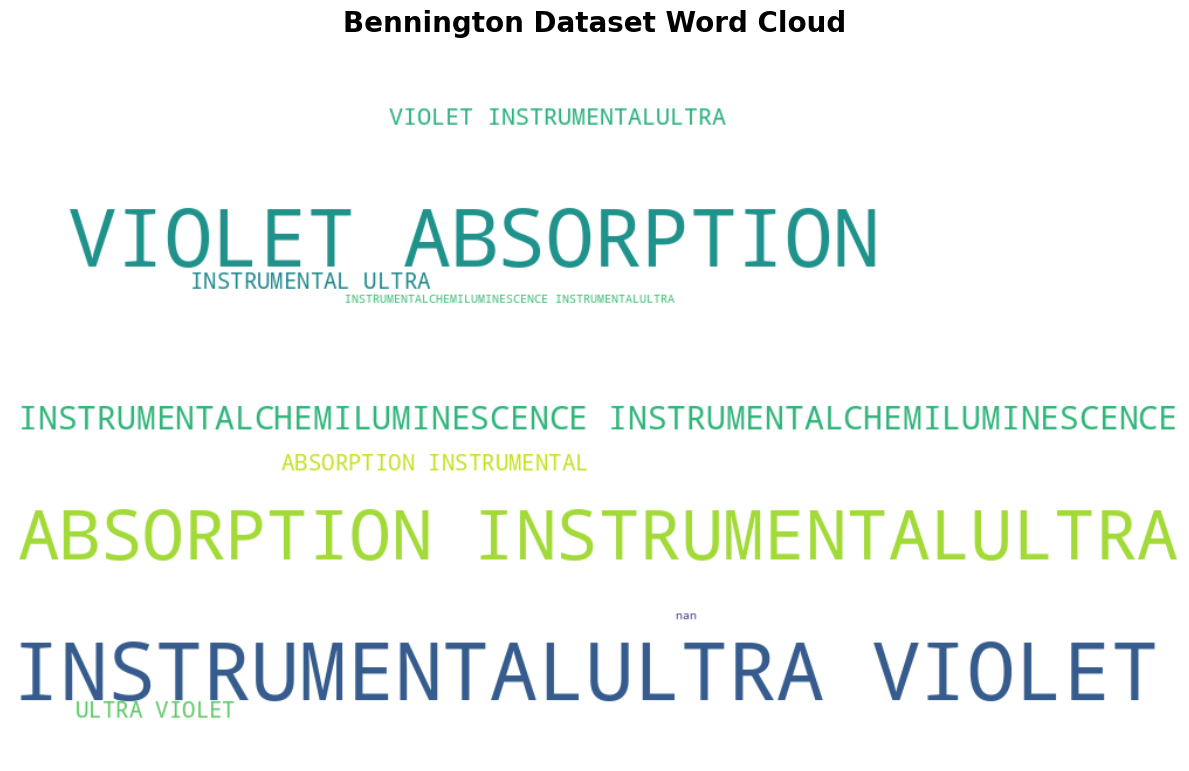


Most frequent words in Bennington Dataset:
VIOLET: 235198
INSTRUMENTALULTRA: 222959
ABSORPTION: 221193
INSTRUMENTALCHEMILUMINESCENCE: 32906
INSTRUMENTAL: 12239
ULTRA: 12239
nan: 2


In [16]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

bennington_path = os.path.join(ozone_folder_path, 'Bennigton.csv')
bennington_df = pd.read_csv(bennington_path, low_memory=False)

bennington_text = ' '.join(bennington_df['Method_Description'].astype(str).dropna())

bennington_text = re.sub(r'[^a-zA-Z\s]', '', bennington_text)

bennington_wordcloud = WordCloud(width=1000, height=600, background_color='white',
                                  colormap='viridis', contour_color='black', contour_width=1,
                                  max_words=100, min_font_size=10).generate(bennington_text)

plt.figure(figsize=(12, 8))
plt.imshow(bennington_wordcloud, interpolation='bilinear')
plt.title('Bennington Dataset Word Cloud', fontsize=20, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()
words = bennington_text.split()
word_counts = Counter(words)

print("\nMost frequent words in Bennington Dataset:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Bennington Dataset Split (80-10-10):
Training set: 214484 rows
Validation set: 26811 rows
Test set: 26811 rows
Preparing features...
Epoch 1/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - loss: 0.9201 - mae: 0.7521 - val_loss: 0.8557 - val_mae: 0.7191 - learning_rate: 0.0010
Epoch 2/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 0.8581 - mae: 0.7225 - val_loss: 0.8615 - val_mae: 0.7208 - learning_rate: 0.0010
Epoch 3/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 0.8541 - mae: 0.7194 - val_loss: 0.8510 - val_mae: 0.7167 - learning_rate: 0.0010
Epoch 4/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - loss: 0.8441 - mae: 0.7164 - val_loss: 0.8557 - val_mae: 0.7192 - learning_rate: 0.0010
Epoch 5/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 50s 7ms/step - loss: 0.8403 - mae: 0.7152 - val_loss: 0.8495 - val_mae: 0.7164 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
838

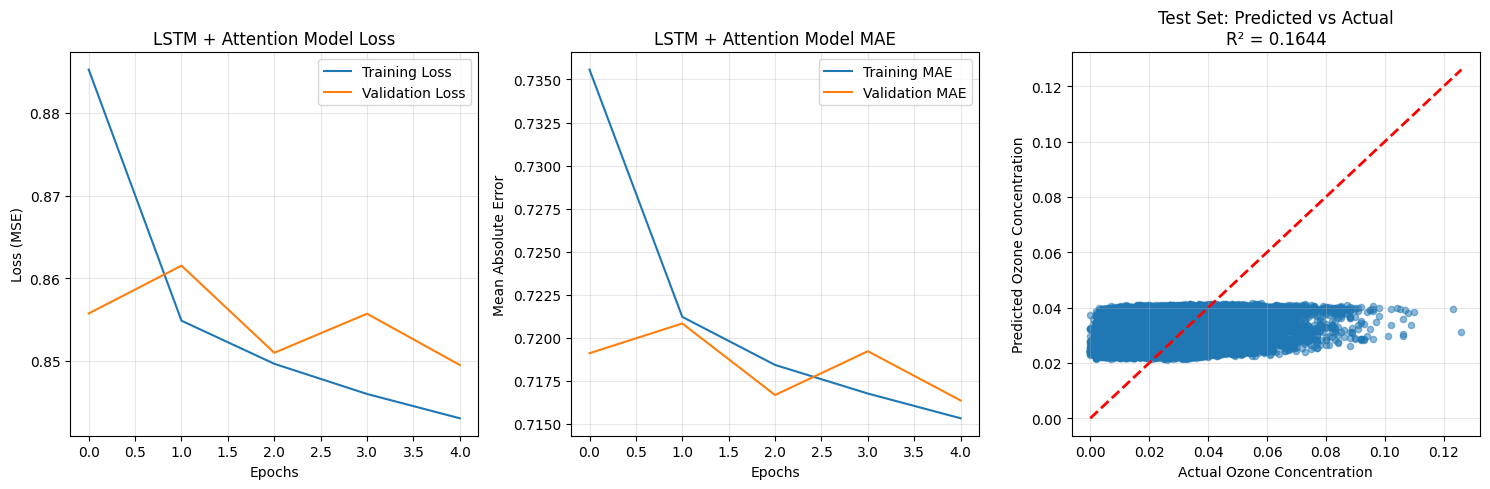


Model saved as 'lstm_attention_ozone_model.h5'


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Attention, Add, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Split Bennington dataset: 80% train, 20% temp (for validation and test)
bennington_train, bennington_temp = train_test_split(bennington_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
bennington_val, bennington_test = train_test_split(bennington_temp, test_size=0.5, random_state=42)

print("Bennington Dataset Split (80-10-10):")
print(f"Training set: {len(bennington_train)} rows")
print(f"Validation set: {len(bennington_val)} rows")
print(f"Test set: {len(bennington_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for LSTM + Attention model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Bennington dataset
print("Preparing features...")

# Bennington dataset
bennington_train_X, bennington_train_y = prepare_features(bennington_train)
bennington_val_X, bennington_val_y = prepare_features(bennington_val)
bennington_test_X, bennington_test_y = prepare_features(bennington_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if bennington_train_y is not None and bennington_train_y.isnull().any():
    bennington_train_y = bennington_train_y.fillna(bennington_train_y.median())

# Impute NaNs in y_val with its median
if bennington_val_y is not None and bennington_val_y.isnull().any():
    bennington_val_y = bennington_val_y.fillna(bennington_val_y.median())

# Impute NaNs in y_test with its median
if bennington_test_y is not None and bennington_test_y.isnull().any():
    bennington_test_y = bennington_test_y.fillna(bennington_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
bennington_train_X_scaled = scaler_X.fit_transform(bennington_train_X)
bennington_val_X_scaled = scaler_X.transform(bennington_val_X)
bennington_test_X_scaled = scaler_X.transform(bennington_test_X)

bennington_train_y_scaled = scaler_y.fit_transform(bennington_train_y.values.reshape(-1, 1)).flatten()
bennington_val_y_scaled = scaler_y.transform(bennington_val_y.values.reshape(-1, 1)).flatten()
bennington_test_y_scaled = scaler_y.transform(bennington_test_y.values.reshape(-1, 1)).flatten()

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
bennington_train_X_seq, bennington_train_y_seq = create_sequences(bennington_train_X_scaled, bennington_train_y_scaled, sequence_length)
bennington_val_X_seq, bennington_val_y_seq = create_sequences(bennington_val_X_scaled, bennington_val_y_scaled, sequence_length)
bennington_test_X_seq, bennington_test_y_seq = create_sequences(bennington_test_X_scaled, bennington_test_y_scaled, sequence_length)

# LSTM + Attention Mechanism Model Architecture
def create_lstm_attention_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layer
    lstm = LSTM(100, return_sequences=True)(inputs)

    # Attention mechanism
    attention = Attention(use_scale=True)([lstm, lstm])  # Scaled attention
    attention = Dropout(0.2)(attention)  # Optional dropout for regularization

    # LSTM after attention
    lstm2 = LSTM(50, return_sequences=False)(attention)

    # Dense layers
    dense1 = Dense(50, activation='relu')(lstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, bennington_train_X_scaled.shape[1])
lstm_attention_model = create_lstm_attention_model(input_shape)

# Compile the model
lstm_attention_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = lstm_attention_model.fit(
    bennington_train_X_seq, bennington_train_y_seq,
    validation_data=(bennington_val_X_seq, bennington_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
bennington_train_pred = lstm_attention_model.predict(bennington_train_X_seq)
bennington_val_pred = lstm_attention_model.predict(bennington_val_X_seq)
bennington_test_pred = lstm_attention_model.predict(bennington_test_X_seq)

# Inverse transform predictions and actual values
bennington_train_y_actual = scaler_y.inverse_transform(bennington_train_y_seq.reshape(-1, 1)).flatten()
bennington_val_y_actual = scaler_y.inverse_transform(bennington_val_y_seq.reshape(-1, 1)).flatten()
bennington_test_y_actual = scaler_y.inverse_transform(bennington_test_y_seq.reshape(-1, 1)).flatten()

bennington_train_y_pred = scaler_y.inverse_transform(bennington_train_pred).flatten()
bennington_val_y_pred = scaler_y.inverse_transform(bennington_val_pred).flatten()
bennington_test_y_pred = scaler_y.inverse_transform(bennington_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(bennington_train_y_actual, bennington_train_y_pred, "Training")
val_metrics = calculate_metrics(bennington_val_y_actual, bennington_val_y_pred, "Validation")
test_metrics = calculate_metrics(bennington_test_y_actual, bennington_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM + Attention Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('LSTM + Attention Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(bennington_test_y_actual, bennington_test_y_pred, alpha=0.5, s=20)
plt.plot([bennington_test_y_actual.min(), bennington_test_y_actual.max()],
         [bennington_test_y_actual.min(), bennington_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
lstm_attention_model.save('lstm_attention_ozone_model.h5')
print("\nModel saved as 'lstm_attention_ozone_model.h5'")



In [37]:
lstm_attention_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 10, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 10, 100)   │     44,400 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 10, 100)   │          1 │ lstm_8[0][0],     │
│ (Attention)         │                   │            │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 10, 100)   │          0 │ attention[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 50)        │     30,200 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 50)        │      2,550 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 50)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 25)        │      1,275 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 25)        │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         26 │ dropout_14[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 235,358 (919.37 KB)

 Trainable params: 78,452 (306.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156,906 (612.92 KB)

In [39]:
from sklearn.model_selection import train_test_split

# Split Bennington dataset: 80% train, 20% temp (for validation and test)
bennington_train, bennington_temp = train_test_split(bennington_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
bennington_val, bennington_test = train_test_split(bennington_temp, test_size=0.5, random_state=42)

print("Bennington Dataset Split (80-10-10):")
print(f"Training set: {len(bennington_train)} rows")
print(f"Validation set: {len(bennington_val)} rows")
print(f"Test set: {len(bennington_test)} rows")

# Data preprocessing for CNN-LSTM model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for CNN-LSTM model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]



Bennington Dataset Split (80-10-10):
Training set: 214484 rows
Validation set: 26811 rows
Test set: 26811 rows


In [42]:
# Bennington dataset
bennington_train_X, bennington_train_y = prepare_features(bennington_train)
bennington_val_X, bennington_val_y = prepare_features(bennington_val)
bennington_test_X, bennington_test_y = prepare_features(bennington_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if bennington_train_y is not None and bennington_train_y.isnull().any():
    bennington_train_y = bennington_train_y.fillna(bennington_train_y.median())

# Impute NaNs in y_val with its median
if bennington_val_y is not None and bennington_val_y.isnull().any():
    bennington_val_y = bennington_val_y.fillna(bennington_val_y.median())

# Impute NaNs in y_test with its median
if bennington_test_y is not None and bennington_test_y.isnull().any():
    bennington_test_y = bennington_test_y.fillna(bennington_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
bennington_train_X_scaled = scaler_X.fit_transform(bennington_train_X)
bennington_val_X_scaled = scaler_X.transform(bennington_val_X)
bennington_test_X_scaled = scaler_X.transform(bennington_test_X)

bennington_train_y_scaled = scaler_y.fit_transform(bennington_train_y.values.reshape(-1, 1)).flatten()
bennington_val_y_scaled = scaler_y.transform(bennington_val_y.values.reshape(-1, 1)).flatten()
bennington_test_y_scaled = scaler_y.transform(bennington_test_y.values.reshape(-1, 1)).flatten()

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
bennington_train_X_seq, bennington_train_y_seq = create_sequences(bennington_train_X_scaled, bennington_train_y_scaled, sequence_length)
bennington_val_X_seq, bennington_val_y_seq = create_sequences(bennington_val_X_scaled, bennington_val_y_scaled, sequence_length)
bennington_test_X_seq, bennington_test_y_seq = create_sequences(bennington_test_X_scaled, bennington_test_y_scaled, sequence_length)

# CNN-LSTM Hybrid Model Architecture
def create_cnn_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # CNN layers
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(0.2)(conv1)

    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv1)
    conv2 = MaxPooling1D(pool_size=2)(conv2)
    conv2 = Dropout(0.2)(conv2)

    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)
    conv3 = Dropout(0.2)(conv3)

    # LSTM layers
    lstm1 = LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(conv3)
    lstm2 = LSTM(50, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)(lstm1)

    # Dense layers
    dense1 = Dense(50, activation='relu')(lstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, bennington_train_X_scaled.shape[1])
cnn_lstm_model = create_cnn_lstm_model(input_shape)

# Compile the model
cnn_lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)



In [43]:
cnn_lstm_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 10, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 5, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 2, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 2, 100)         │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,379 (591.32 KB)

 Trainable params: 151,379 (591.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#cnn_lstm

Epoch 1/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.9428 - mae: 0.7620 - val_loss: 0.8915 - val_mae: 0.7337 - learning_rate: 0.0010
Epoch 2/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - loss: 0.8922 - mae: 0.7376 - val_loss: 0.8794 - val_mae: 0.7300 - learning_rate: 0.0010
Epoch 3/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.8829 - mae: 0.7341 - val_loss: 0.8728 - val_mae: 0.7271 - learning_rate: 0.0010
Epoch 4/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: 0.8701 - mae: 0.7289 - val_loss: 0.8685 - val_mae: 0.7229 - learning_rate: 0.0010
Epoch 5/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: 0.8699 - mae: 0.7260 - val_loss: 0.8676 - val_mae: 0.7240 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
838/838 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Training Set Metrics:
MSE: 0.0002
RMSE: 0.0144
MAE: 0.0112
R² Score: 0.1492

Validation Set Me

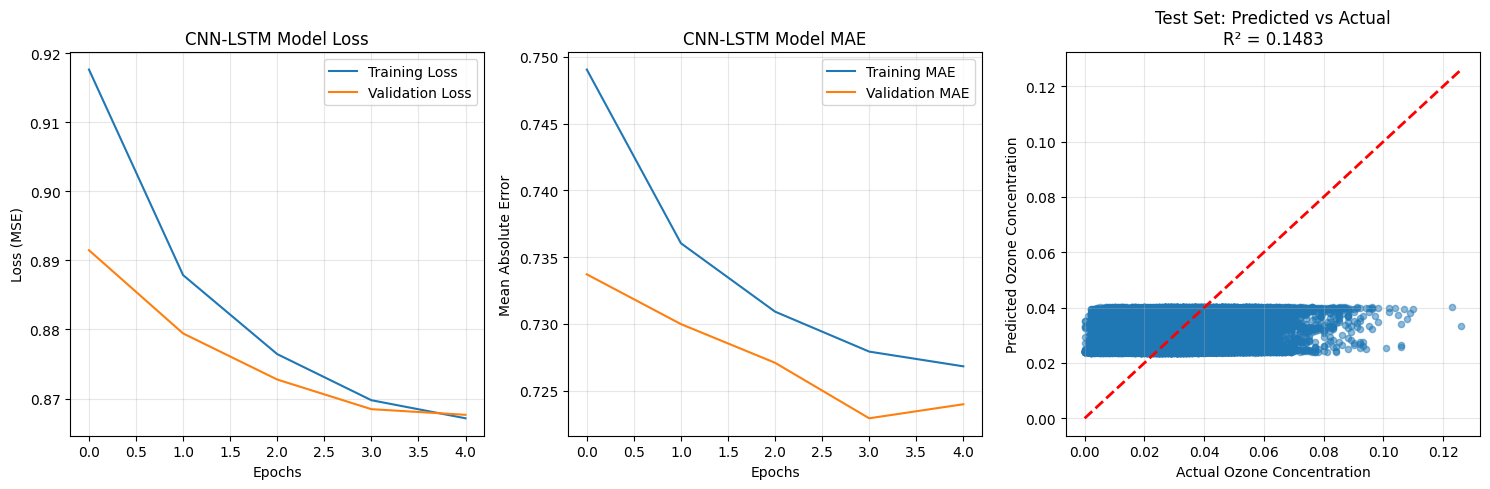


Model saved as 'cnn_lstm_ozone_model.h5'

Feature Importance Analysis:
          Feature  Importance
9       DayOfYear   30.884438
6           Month   27.458878
5            Year   19.735975
3     County_Code   17.655663
2      State_Code   16.513205
1       Longitude   16.168114
0        Latitude   15.744638
4  Parameter_Code   15.621628
8       DayOfWeek   14.092051
7             Day   11.072205


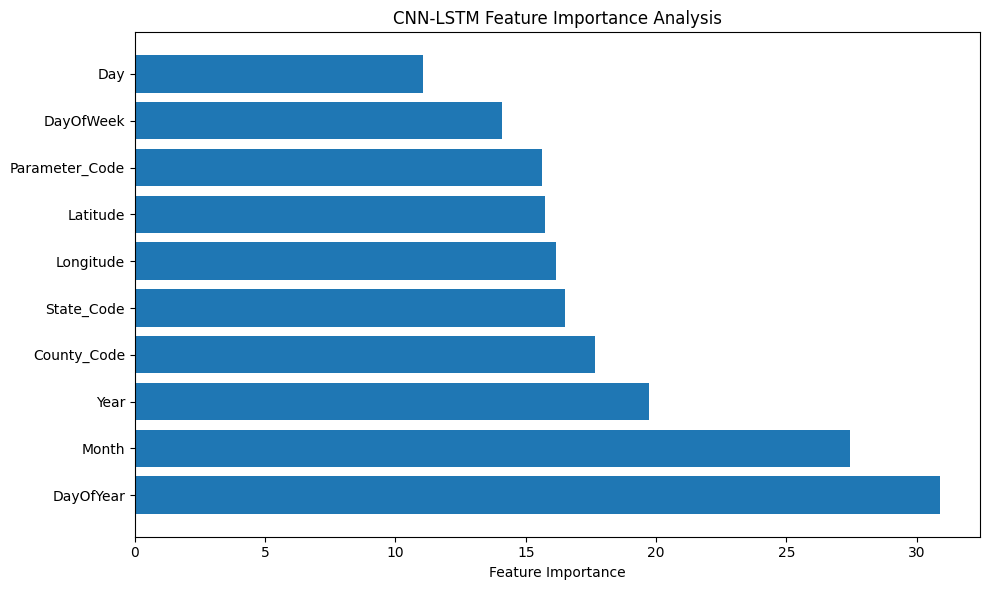

In [44]:
# Train the model
history = cnn_lstm_model.fit(
    bennington_train_X_seq, bennington_train_y_seq,
    validation_data=(bennington_val_X_seq, bennington_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
bennington_train_pred = cnn_lstm_model.predict(bennington_train_X_seq)
bennington_val_pred = cnn_lstm_model.predict(bennington_val_X_seq)
bennington_test_pred = cnn_lstm_model.predict(bennington_test_X_seq)

# Inverse transform predictions and actual values
bennington_train_y_actual = scaler_y.inverse_transform(bennington_train_y_seq.reshape(-1, 1)).flatten()
bennington_val_y_actual = scaler_y.inverse_transform(bennington_val_y_seq.reshape(-1, 1)).flatten()
bennington_test_y_actual = scaler_y.inverse_transform(bennington_test_y_seq.reshape(-1, 1)).flatten()

bennington_train_y_pred = scaler_y.inverse_transform(bennington_train_pred).flatten()
bennington_val_y_pred = scaler_y.inverse_transform(bennington_val_pred).flatten()
bennington_test_y_pred = scaler_y.inverse_transform(bennington_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(bennington_train_y_actual, bennington_train_y_pred, "Training")
val_metrics = calculate_metrics(bennington_val_y_actual, bennington_val_y_pred, "Validation")
test_metrics = calculate_metrics(bennington_test_y_actual, bennington_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('CNN-LSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(bennington_test_y_actual, bennington_test_y_pred, alpha=0.5, s=20)
plt.plot([bennington_test_y_actual.min(), bennington_test_y_actual.max()],
         [bennington_test_y_actual.min(), bennington_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
cnn_lstm_model.save('cnn_lstm_ozone_model.h5')
print("\nModel saved as 'cnn_lstm_ozone_model.h5'")

# --- Feature Importance Analysis ---
def analyze_feature_importance(model, feature_names):
    """
    Analyze feature importance based on the weights of the first Conv1D layer.
    """
    if not model.layers or not isinstance(model.layers[1], Conv1D):
        print("Error: The model does not have a Conv1D layer.")
        return

    # Extract weights of the first Conv1D layer
    conv_weights = model.layers[1].get_weights()[0]  # shape: (kernel_size, input_dim, filters)

    # Compute the importance for each input feature (sum of absolute weights across kernel and filters)
    feature_importance = np.sum(np.abs(conv_weights), axis=(0, 2))  # Corrected summation axis

    # Create a dataframe for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    return importance_df

# Ensure the feature names are available
# Assuming bennington_train_X is still in the environment from the previous cell execution
feature_names = bennington_train_X.columns.tolist()

# Analyze feature importance
importance_df = analyze_feature_importance(cnn_lstm_model, feature_names)

# Plot feature importance
if importance_df is not None:
    print("\nFeature Importance Analysis:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Feature Importance')
    plt.title('CNN-LSTM Feature Importance Analysis')
    plt.tight_layout()
    plt.show()



In [ ]:
#
#ARIMA
#

Bennington Dataset Split (80-10-10):
Training set: 214484 rows
Validation set: 26811 rows
Test set: 26811 rows
Preparing features...
Epoch 1/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 73s 10ms/step - loss: 1.3968 - mae: 0.9338 - val_loss: 1.3138 - val_mae: 0.9013 - learning_rate: 0.0010
Epoch 2/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 69s 10ms/step - loss: 1.2970 - mae: 0.8982 - val_loss: 1.2906 - val_mae: 0.8922 - learning_rate: 0.0010
Epoch 3/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - loss: 1.2930 - mae: 0.8965 - val_loss: 1.3004 - val_mae: 0.8950 - learning_rate: 0.0010
Epoch 4/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - loss: 1.2961 - mae: 0.8967 - val_loss: 1.2855 - val_mae: 0.8905 - learning_rate: 0.0010
Epoch 5/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - loss: 1.2911 - mae: 0.8947 - val_loss: 1.2936 - val_mae: 0.8936 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 4.
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

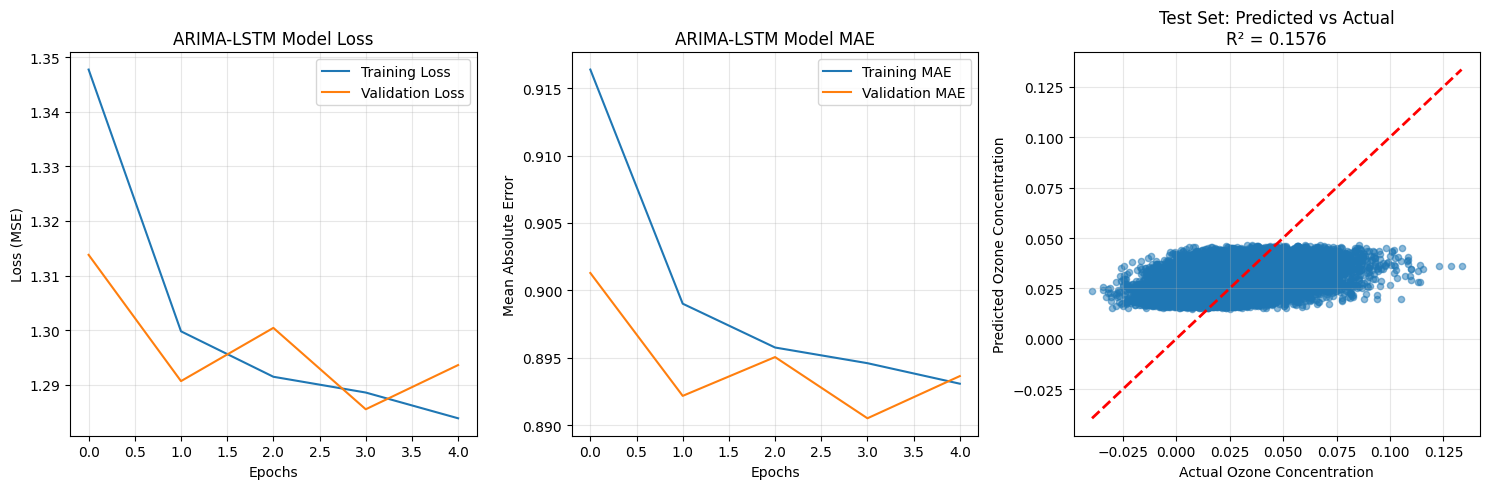


Model saved as 'arima_lstm_ozone_model.h5'


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Split Bennington dataset: 80% train, 20% temp (for validation and test)
bennington_train, bennington_temp = train_test_split(bennington_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
bennington_val, bennington_test = train_test_split(bennington_temp, test_size=0.5, random_state=42)

print("Bennington Dataset Split (80-10-10):")
print(f"Training set: {len(bennington_train)} rows")
print(f"Validation set: {len(bennington_val)} rows")
print(f"Test set: {len(bennington_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for ARIMA-LSTM model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Bennington dataset
print("Preparing features...")

# Bennington dataset
bennington_train_X, bennington_train_y = prepare_features(bennington_train)
bennington_val_X, bennington_val_y = prepare_features(bennington_val)
bennington_test_X, bennington_test_y = prepare_features(bennington_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if bennington_train_y is not None and bennington_train_y.isnull().any():
    bennington_train_y = bennington_train_y.fillna(bennington_train_y.median())

# Impute NaNs in y_val with its median
if bennington_val_y is not None and bennington_val_y.isnull().any():
    bennington_val_y = bennington_val_y.fillna(bennington_val_y.median())

# Impute NaNs in y_test with its median
if bennington_test_y is not None and bennington_test_y.isnull().any():
    bennington_test_y = bennington_test_y.fillna(bennington_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
bennington_train_X_scaled = scaler_X.fit_transform(bennington_train_X)
bennington_val_X_scaled = scaler_X.transform(bennington_val_X)
bennington_test_X_scaled = scaler_X.transform(bennington_test_X)

bennington_train_y_scaled = scaler_y.fit_transform(bennington_train_y.values.reshape(-1, 1)).flatten()
bennington_val_y_scaled = scaler_y.transform(bennington_val_y.values.reshape(-1, 1)).flatten()
bennington_test_y_scaled = scaler_y.transform(bennington_test_y.values.reshape(-1, 1)).flatten()

# ARIMA Differencing for Stationarity
def arima_differencing(y, order=(1,1,0)):
    model = ARIMA(y, order=order)
    model_fit = model.fit()
    residuals = model_fit.resid
    return residuals

# Apply ARIMA differencing on the target variable
bennington_train_y_diff = arima_differencing(bennington_train_y_scaled)
bennington_val_y_diff = arima_differencing(bennington_val_y_scaled)
bennington_test_y_diff = arima_differencing(bennington_test_y_scaled)

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
bennington_train_X_seq, bennington_train_y_seq = create_sequences(bennington_train_X_scaled, bennington_train_y_diff, sequence_length)
bennington_val_X_seq, bennington_val_y_seq = create_sequences(bennington_val_X_scaled, bennington_val_y_diff, sequence_length)
bennington_test_X_seq, bennington_test_y_seq = create_sequences(bennington_test_X_scaled, bennington_test_y_diff, sequence_length)

# ARIMA-LSTM Model Architecture
def create_arima_lstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # LSTM layers
    lstm1 = LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(inputs)
    lstm2 = LSTM(50, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)(lstm1)

    # Dense layers
    dense1 = Dense(50, activation='relu')(lstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, bennington_train_X_scaled.shape[1])
arima_lstm_model = create_arima_lstm_model(input_shape)

# Compile the model
arima_lstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = arima_lstm_model.fit(
    bennington_train_X_seq, bennington_train_y_seq,
    validation_data=(bennington_val_X_seq, bennington_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
bennington_train_pred = arima_lstm_model.predict(bennington_train_X_seq)
bennington_val_pred = arima_lstm_model.predict(bennington_val_X_seq)
bennington_test_pred = arima_lstm_model.predict(bennington_test_X_seq)

# Inverse transform predictions and actual values
bennington_train_y_actual = scaler_y.inverse_transform(bennington_train_y_seq.reshape(-1, 1)).flatten()
bennington_val_y_actual = scaler_y.inverse_transform(bennington_val_y_seq.reshape(-1, 1)).flatten()
bennington_test_y_actual = scaler_y.inverse_transform(bennington_test_y_seq.reshape(-1, 1)).flatten()

bennington_train_y_pred = scaler_y.inverse_transform(bennington_train_pred).flatten()
bennington_val_y_pred = scaler_y.inverse_transform(bennington_val_pred).flatten()
bennington_test_y_pred = scaler_y.inverse_transform(bennington_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(bennington_train_y_actual, bennington_train_y_pred, "Training")
val_metrics = calculate_metrics(bennington_val_y_actual, bennington_val_y_pred, "Validation")
test_metrics = calculate_metrics(bennington_test_y_actual, bennington_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ARIMA-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('ARIMA-LSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(bennington_test_y_actual, bennington_test_y_pred, alpha=0.5, s=20)
plt.plot([bennington_test_y_actual.min(), bennington_test_y_actual.max()],
         [bennington_test_y_actual.min(), bennington_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
arima_lstm_model.save('arima_lstm_ozone_model.h5')
print("\nModel saved as 'arima_lstm_ozone_model.h5'")

In [47]:
arima_lstm_model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 10, 100)        │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,355 (919.36 KB)

 Trainable params: 78,451 (306.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 156,904 (612.91 KB)

In [48]:
#CNN + BiLSTM

Bennington Dataset Split (80-10-10):
Training set: 214484 rows
Validation set: 26811 rows
Test set: 26811 rows
Preparing features...
Epoch 1/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 105s 15ms/step - loss: 0.9041 - mae: 0.7445 - val_loss: 0.8552 - val_mae: 0.7180 - learning_rate: 0.0010
Epoch 2/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 97s 14ms/step - loss: 0.8542 - mae: 0.7218 - val_loss: 0.8619 - val_mae: 0.7221 - learning_rate: 0.0010
Epoch 3/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 97s 14ms/step - loss: 0.8544 - mae: 0.7223 - val_loss: 0.8490 - val_mae: 0.7150 - learning_rate: 0.0010
Epoch 4/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 97s 14ms/step - loss: 0.8466 - mae: 0.7180 - val_loss: 0.8560 - val_mae: 0.7188 - learning_rate: 0.0010
Epoch 5/5
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 97s 15ms/step - loss: 0.8382 - mae: 0.7136 - val_loss: 0.8539 - val_mae: 0.7170 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.
6703/6703 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
838/838 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

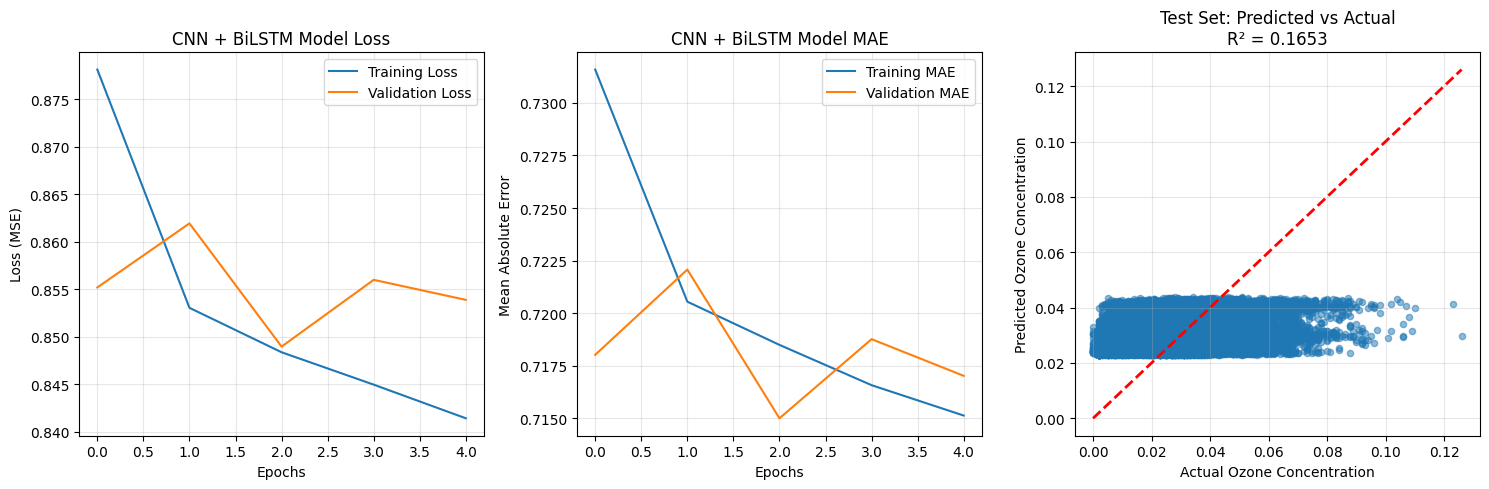


Model saved as 'cnn_bilstm_ozone_model.h5'


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Split Bennington dataset: 80% train, 20% temp (for validation and test)
bennington_train, bennington_temp = train_test_split(bennington_df, test_size=0.2, random_state=42)

# Split the 20% temp data into 10% validation and 10% test
# Since temp is 20% of original, splitting temp with test_size=0.5 makes test 10% of original
bennington_val, bennington_test = train_test_split(bennington_temp, test_size=0.5, random_state=42)

print("Bennington Dataset Split (80-10-10):")
print(f"Training set: {len(bennington_train)} rows")
print(f"Validation set: {len(bennington_val)} rows")
print(f"Test set: {len(bennington_test)} rows")

# Feature engineering function
def prepare_features(df):
    """
    Prepare features for CNN + BiLSTM model
    """
    df_processed = df.copy()

    # Convert Date_Local to datetime and extract temporal features
    if 'Date_Local' in df_processed.columns:
        df_processed['Date_Local'] = pd.to_datetime(df_processed['Date_Local'], errors='coerce')
        df_processed.dropna(subset=['Date_Local'], inplace=True)  # Drop rows with NaT in Date_Local

        df_processed['Year'] = df_processed['Date_Local'].dt.year
        df_processed['Month'] = df_processed['Date_Local'].dt.month
        df_processed['Day'] = df_processed['Date_Local'].dt.day
        df_processed['DayOfWeek'] = df_processed['Date_Local'].dt.dayofweek
        df_processed['DayOfYear'] = df_processed['Date_Local'].dt.dayofyear
    else:
        print("Warning: 'Date_Local' column not found. Temporal features will not be created.")
        df_processed['Year'] = 0
        df_processed['Month'] = 0
        df_processed['Day'] = 0
        df_processed['DayOfWeek'] = 0
        df_processed['DayOfYear'] = 0

    # Select relevant numerical features
    feature_columns = [
        'Latitude', 'Longitude', 'State_Code', 'County_Code',
        'Parameter_Code', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'
    ]
    feature_columns = [col for col in feature_columns if col in df_processed.columns]

    # Target variable
    target = 'Sample_Measurement'
    if target not in df_processed.columns:
        print(f"Error: Target column '{target}' not found in the DataFrame.")
        return None, None

    return df_processed[feature_columns], df_processed[target]

# Prepare features for Bennington dataset
print("Preparing features...")

# Bennington dataset
bennington_train_X, bennington_train_y = prepare_features(bennington_train)
bennington_val_X, bennington_val_y = prepare_features(bennington_val)
bennington_test_X, bennington_test_y = prepare_features(bennington_test)

# Handle NaNs in the target variables (y_train, y_val, y_test)
# Impute NaNs in y_train with its median
if bennington_train_y is not None and bennington_train_y.isnull().any():
    bennington_train_y = bennington_train_y.fillna(bennington_train_y.median())

# Impute NaNs in y_val with its median
if bennington_val_y is not None and bennington_val_y.isnull().any():
    bennington_val_y = bennington_val_y.fillna(bennington_val_y.median())

# Impute NaNs in y_test with its median
if bennington_test_y is not None and bennington_test_y.isnull().any():
    bennington_test_y = bennington_test_y.fillna(bennington_test_y.median())

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scalers on training data
bennington_train_X_scaled = scaler_X.fit_transform(bennington_train_X)
bennington_val_X_scaled = scaler_X.transform(bennington_val_X)
bennington_test_X_scaled = scaler_X.transform(bennington_test_X)

bennington_train_y_scaled = scaler_y.fit_transform(bennington_train_y.values.reshape(-1, 1)).flatten()
bennington_val_y_scaled = scaler_y.transform(bennington_val_y.values.reshape(-1, 1)).flatten()
bennington_test_y_scaled = scaler_y.transform(bennington_test_y.values.reshape(-1, 1)).flatten()

# Create sequences for time series modeling
def create_sequences(X, y, sequence_length=10):
    if X is None or y is None:
        return None, None
    if len(X) != len(y):
        return None, None
    if len(X) < sequence_length:
        return None, None

    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length + 1):
        X_seq.append(X[i:(i + sequence_length)])
        y_seq.append(y[i + sequence_length - 1])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
sequence_length = 10
bennington_train_X_seq, bennington_train_y_seq = create_sequences(bennington_train_X_scaled, bennington_train_y_scaled, sequence_length)
bennington_val_X_seq, bennington_val_y_seq = create_sequences(bennington_val_X_scaled, bennington_val_y_scaled, sequence_length)
bennington_test_X_seq, bennington_test_y_seq = create_sequences(bennington_test_X_scaled, bennington_test_y_scaled, sequence_length)

# CNN + BiLSTM Model Architecture
def create_cnn_bilstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # CNN layers
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(0.2)(conv1)

    # BiLSTM layers
    bilstm1 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(conv1)
    bilstm2 = Bidirectional(LSTM(50, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(bilstm1)

    # Dense layers
    dense1 = Dense(50, activation='relu')(bilstm2)
    dense1 = Dropout(0.3)(dense1)

    dense2 = Dense(25, activation='relu')(dense1)
    dense2 = Dropout(0.2)(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (sequence_length, bennington_train_X_scaled.shape[1])
cnn_bilstm_model = create_cnn_bilstm_model(input_shape)

# Compile the model
cnn_bilstm_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train the model
history = cnn_bilstm_model.fit(
    bennington_train_X_seq, bennington_train_y_seq,
    validation_data=(bennington_val_X_seq, bennington_val_y_seq),
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predictions
bennington_train_pred = cnn_bilstm_model.predict(bennington_train_X_seq)
bennington_val_pred = cnn_bilstm_model.predict(bennington_val_X_seq)
bennington_test_pred = cnn_bilstm_model.predict(bennington_test_X_seq)

# Inverse transform predictions and actual values
bennington_train_y_actual = scaler_y.inverse_transform(bennington_train_y_seq.reshape(-1, 1)).flatten()
bennington_val_y_actual = scaler_y.inverse_transform(bennington_val_y_seq.reshape(-1, 1)).flatten()
bennington_test_y_actual = scaler_y.inverse_transform(bennington_test_y_seq.reshape(-1, 1)).flatten()

bennington_train_y_pred = scaler_y.inverse_transform(bennington_train_pred).flatten()
bennington_val_y_pred = scaler_y.inverse_transform(bennington_val_pred).flatten()
bennington_test_y_pred = scaler_y.inverse_transform(bennington_test_pred).flatten()

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Calculate metrics for all sets
train_metrics = calculate_metrics(bennington_train_y_actual, bennington_train_y_pred, "Training")
val_metrics = calculate_metrics(bennington_val_y_actual, bennington_val_y_pred, "Validation")
test_metrics = calculate_metrics(bennington_test_y_actual, bennington_test_y_pred, "Test")

# Plot training history
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN + BiLSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('CNN + BiLSTM Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Prediction vs Actual scatter plot
plt.subplot(1, 3, 3)
plt.scatter(bennington_test_y_actual, bennington_test_y_pred, alpha=0.5, s=20)
plt.plot([bennington_test_y_actual.min(), bennington_test_y_actual.max()],
         [bennington_test_y_actual.min(), bennington_test_y_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Ozone Concentration')
plt.ylabel('Predicted Ozone Concentration')
plt.title(f'Test Set: Predicted vs Actual\nR² = {test_metrics["R2"]:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save the model
cnn_bilstm_model.save('cnn_bilstm_ozone_model.h5')
print("\nModel saved as 'cnn_bilstm_ozone_model.h5'")



In [50]:
cnn_bilstm_model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 10, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 10, 64)         │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 5, 200)         │       132,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,207 (2.76 MB)

 Trainable params: 240,735 (940.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 481,472 (1.84 MB)